In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

In [6]:
def plot(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
classes = ['Airplane','Automobile','Bird','Cat','deer','dog','frog','horse','ship','truck']

In [8]:
y_train[3]

array([4], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

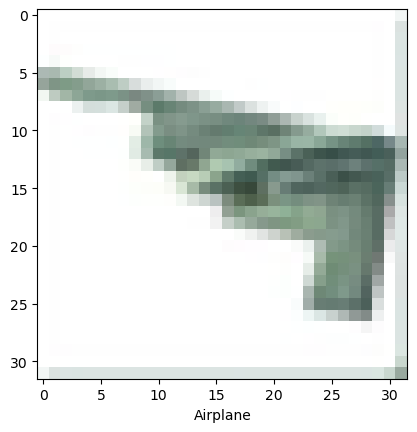

In [13]:
plot(X_train,y_train,12345)

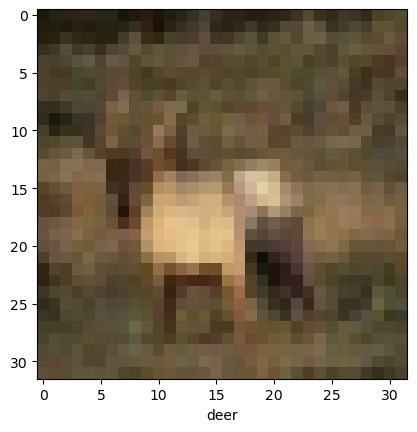

In [14]:
plot(X_train,y_train,3)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [17]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')])

In [21]:
ANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
ANN.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 125ms/step - accuracy: 0.2746 - loss: 2.1984
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 126ms/step - accuracy: 0.3915 - loss: 1.6902
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 126ms/step - accuracy: 0.4240 - loss: 1.6057


In [28]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'), 
    layers.Dense(10,activation='sigmoid')])         

In [29]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
CNN.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 120ms/step - accuracy: 0.4137 - loss: 1.5888
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 119ms/step - accuracy: 0.6563 - loss: 0.9732
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 121ms/step - accuracy: 0.7503 - loss: 0.7073


In [31]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7032 - loss: 0.8763


[0.875049889087677, 0.7024000287055969]